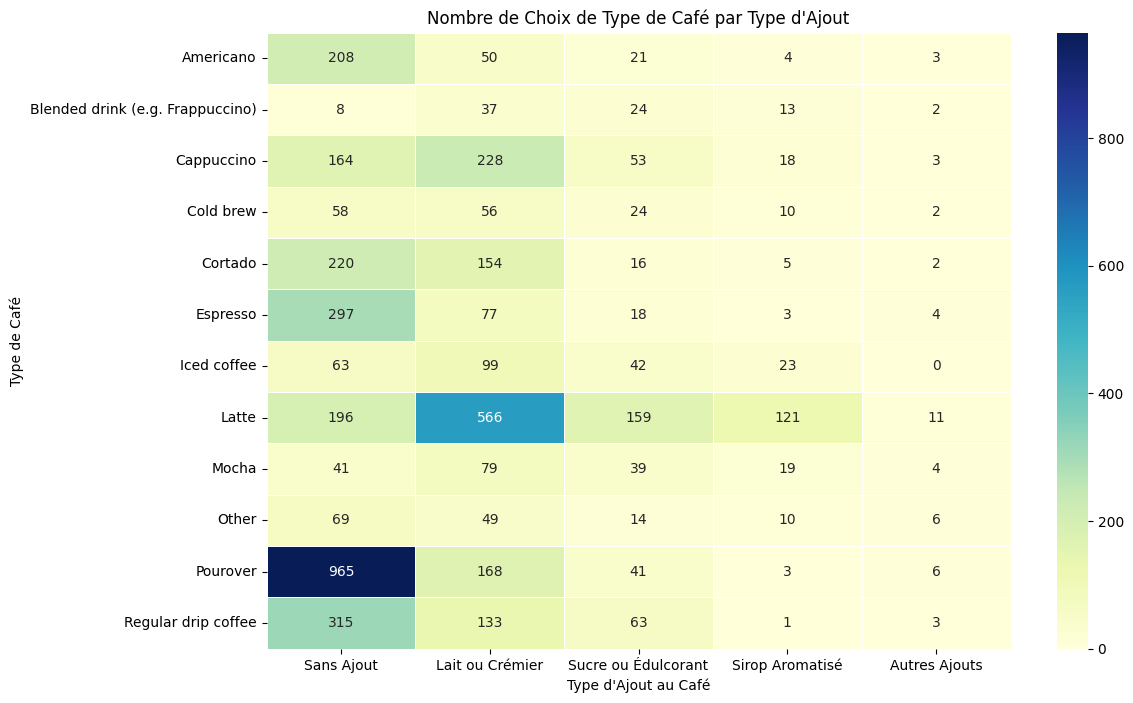

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("archive/GACTT_RESULTS_ANONYMIZED.csv")

colonnes_ajouts = [
    'Do you usually add anything to your coffee? (No - just black)',
    'Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)',
    'Do you usually add anything to your coffee? (Sugar or sweetener)',
    'Do you usually add anything to your coffee? (Flavor syrup)',
    'Do you usually add anything to your coffee? (Other)'
]

colonne_cafe_prefere = 'What is your favorite coffee drink?'

cafe_counts_per_addition = {ajout: data[data[ajout] == True][colonne_cafe_prefere].value_counts() for ajout in colonnes_ajouts}

df_cafe_counts = pd.DataFrame(cafe_counts_per_addition)
df_cafe_counts = df_cafe_counts.fillna(0)

colonnes_ajouts_fr = [
    'Sans Ajout',
    'Lait ou Crémier',
    'Sucre ou Édulcorant',
    'Sirop Aromatisé',
    'Autres Ajouts'
]

df_cafe_counts.columns = colonnes_ajouts_fr

plt.figure(figsize=(12, 8))
sns.heatmap(df_cafe_counts, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)

plt.title('Nombre de Choix de Type de Café par Type d\'Ajout')
plt.xlabel('Type d\'Ajout au Café')
plt.ylabel('Type de Café')

plt.show()